## Observations and Insights 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,how = "left", on=['Mouse ID'])
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice.
no_of_mice = len(combined_data["Mouse ID"].unique())
no_of_mice

249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = combined_data.loc[combined_data.duplicated(subset =["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(dup_mouse)

['g989']


In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
dup_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data.drop_duplicates(subset =["Mouse ID", "Timepoint"]) 
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
clean_df = combined_data[combined_data["Mouse ID"].isin(dup_mouse)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Checking the number of mice in the clean DataFrame.

len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# # mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen = pd.DataFrame(clean_df.groupby("Drug Regimen").count())
drug_regimen["Mean"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
drug_regimen["Median"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
drug_regimen["Standard Deviation"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
drug_regimen["Variance"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
drug_regimen["SEM"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())



# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Tumor Volume Mean": drug_regimen_mean,
                           "Tumor Volume Median": drug_regimen_median,
                           "Tumor Volume Variance": drug_regimen_variance,
                           "Tumor Volume Std Dev": drug_regimen_std,
                           "Tumor Volume SEM": drug_regimen_sem,})
summary_df




,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

[Text(0, 0.5, 'Total number of measurements'), Text(0.5, 0, 'Drug Regimen')]

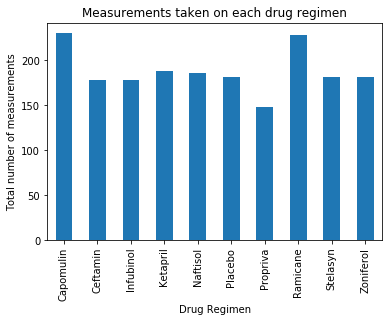

In [58]:
bar_title = "Measurements taken on each drug regimen"
x_label = "Drug Regimen"
y_label = "Total number of measurements"
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

grouped_data = clean_df.groupby(['Drug Regimen'])
datas = grouped_data.count()

column_name = datas.columns[0]
datas = datas.rename(columns={column_name: 'Number of Data Points'})
ax = datas.plot.bar(y='Number of Data Points',title=bar_title,legend=False)
ax.set(xlabel=x_label, ylabel=y_label)



Text(0, 0.5, 'Total number of measurements')

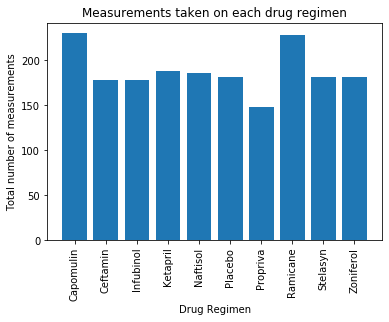

In [59]:

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(datas.index))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, datas['Number of Data Points'])
plt.xticks(tick_locations, datas.index, rotation="vertical")

plt.title(bar_title)
plt.xlabel(x_label)
plt.ylabel(y_label)


#let's just pick the first column, rename that and plot.



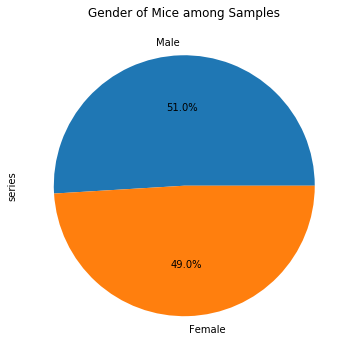

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_title = "Gender of Mice among Samples"
sex_df = pd.DataFrame(clean_df["Sex"].value_counts()).reset_index()
sex_df

import pandas as pd

gender = ['Male', 'Female']
series = pd.Series([958,922], 
                   index=gender, 
                   name='series')

series.plot.pie(figsize=(6, 6),autopct="%1.1f%%",title = pie_title)


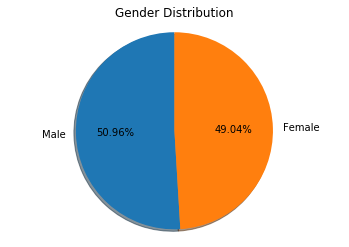

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = sex_df["index"]
members = sex_df["Sex"]
plt.pie(members,labels=gender,autopct='%1.2f%%',shadow=True, startangle=90)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set a title for the chart
plt.title("Gender Distribution")

# Save an image of our chart and print the final product to the screen
plt.show()


## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_df.Timepoint.unique()
clean_df.Timepoint.value_counts()


# Start by getting the last (greatest) timepoint for each mouse
max_tumor_value = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor_value = max_tumor_value.reset_index()
max_tumor_value



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor_value.merge(clean_df,on=["Mouse ID", "Timepoint"], how="left")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [71]:
# Put treatments into a list for for loop (and later for plot labels

treatments = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]
treatments

# # Create empty list to fill with tumor vol data (for plotting)
tumor = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == i, "Tumor Volume (mm3)"]
    tumor_vol   
    # add subset 
    tumor.append(tumor_vol)                                                      
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.50, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    IQR = upper_quartile - lower_quartile
    lower_bound  = lower_quartile - (1.5*IQR)
    upper_bound  = upper_quartile + (1.5*IQR)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"The outlier for {i} is {outliers}")
    
    

The outlier for Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64)
The outlier for Ramicane is Series([], Name: Tumor Volume (mm3), dtype: float64)
The outlier for Infubinol is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The outlier for Ceftamin is Series([], Name: Tumor Volume (mm3), dtype: float64)


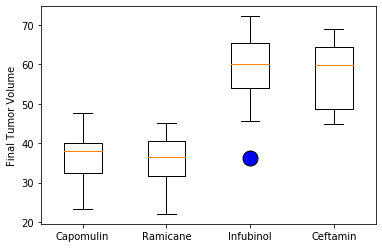

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
output = dict(markerfacecolor = "blue", markersize = 15)
plt.boxplot(tumor, labels = treatments, flierprops=output)
plt.ylabel("Final Tumor Volume")
plt.show()

## Line and Scatter Plots

In [74]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin" ]
capomulin

capomulin_df = capomulin.loc[capomulin["Mouse ID"]=="g316"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


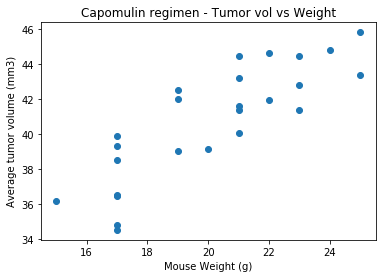

In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin" ]
capomulin
capomulin_avg = capomulin.groupby(["Mouse ID"]).mean()
plt.title("Capomulin regimen - Tumor vol vs Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average tumor volume (mm3)")

plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84
y = 0.95x + 21.55


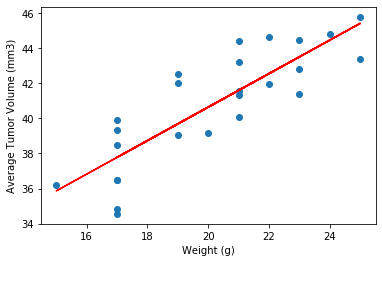

In [77]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]

correlation = round(st.pearsonr(x_values, y_values)[0],2)
correlation
print(f"Correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {correlation}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,30),fontsize=10,color="green")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()